# Lab2 - Linear Regression
## Fijian Earthquakes

In [17]:
from math import sqrt
from scipy.stats import t
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
pd.options.mode.chained_assignment = None
plt.style.use('fivethirtyeight')

%matplotlib inline

quakes = pd.read_csv("quakes.csv")

### Earthquake detection

#### Included in the data set is a column recording the number of stations that detected each earthquake. This refers to a global network of seismographs and it stands to reason that the larger the quake, the more widely it will be detected.

### Exercise 1
#### Create a plot of the relationship between stations and magnitude. How would you characterize the relationship? (If you see overplotting, you may want to add jitter to your points or make them transparent by playing with the alpha value.)

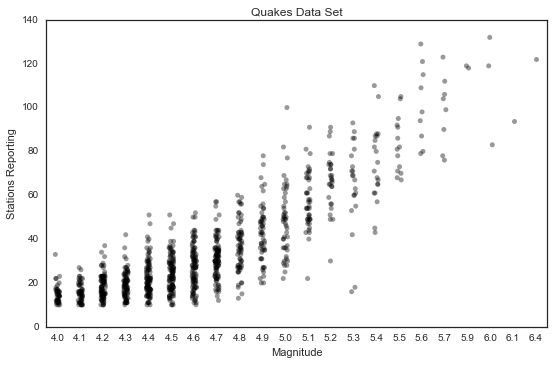

In [2]:
sns.set(style="white")
p1 = sns.stripplot(x="mag",y="stations",data=quakes,color="black",jitter=True,alpha=.4)
p1.set_xlabel("Magnitude")
p1.set_ylabel("Stations Reporting")
p1.set_title("Quakes Data Set")

<font color="blue">**R vs Python Note**: Matplotlib does not appear to have a "jitter" option like ggplot2 does but the Seaborn module does.</font>

### Exercise 2
#### Before you go ahead and fit a linear model to this trend, if in fact there was no relationship between the two, what would you expect the slope to be? What about the intercept?

We would expect the slope of the line to be 0. The y-intercept should be ybar.

### Exercise 3
#### Ok, now go ahead and fit a linear model called m1 to the trend and add that line to the plot from exercise 1. Interpret your slope and intercept in the context of the problem.

                            OLS Regression Results                            
Dep. Variable:               stations   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2625.
Date:                Sun, 22 Jan 2017   Prob (F-statistic):          1.21e-281
Time:                        16:54:42   Log-Likelihood:                -3860.3
No. Observations:                1000   AIC:                             7725.
Df Residuals:                     998   BIC:                             7734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -180.4243      4.190    -43.062      0.0

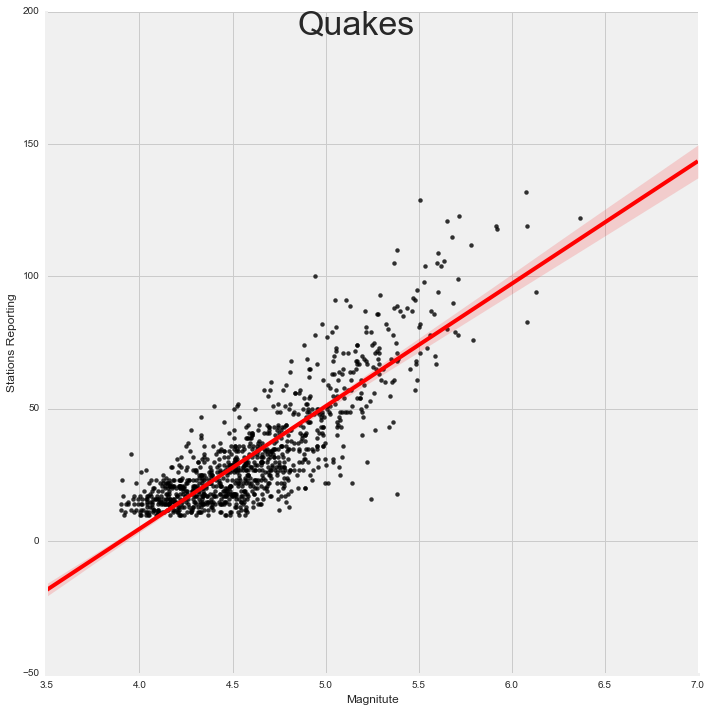

In [61]:
m1 = smf.ols(formula = "stations ~ mag", data=quakes).fit()
print(m1.summary())

p2 = sns.lmplot(x="mag",y="stations",data=quakes,x_jitter=0.1, line_kws={'color': 'red', 'lw':'4'}, 
                scatter_kws={'color':'black'}, 
                size=10)
p2.set_axis_labels("Magnitute","Stations Reporting")
p2.fig.suptitle("Quakes",fontsize=34)

The slope of the model suggests that with each increase of 1 magnitude unit an additional 46 stations 
detect the earthquake. The intercept () describes a useless scenario: the number of stations that 
detect a earthquake of magnitude 0.

<font color="blue">**R vs Python Note:** Python (matplotlib) does not appear to have an easy option to plot the OLS regression line like R (ggplot2) does with geom_smooth(method="lm"). Seaborn's lmplot has these capabilities.</font>

### Exercise 4
#### Verify the way that lm() has computed your slope correctly by using R (Python) to do the calculation using the equation for the slope based on X and Y.

In [5]:
xdev = quakes["mag"] - quakes["mag"].mean()
ydev = quakes["stations"] - quakes["stations"].mean()
prod = xdev*ydev
ssd_mag = quakes["mag"].var() * len(quakes["mag"])
beta1 = sum(prod)/ssd_mag
beta1

46.235928552600328

Estimating the regression slope manually gives the same value (46.235) as computed with ols.fit

### Exercise 5
#### Using R (Python), calculate a 95% confidence interval for the slope of the model that you fit in exercise 3. Confirm the calculation using confint() (conf_int()[1:]).


In [8]:
### the regression as a function
def reg(model,x):
    return model.params[0] + (model.params[1] * x)
    
### calculate rss
m1_resid = (quakes["stations"] - reg(m1,quakes["mag"]))**2
m1_rss = sum(m1_resid)

### calculate SE beta_1^hat
se_beta1 = sqrt(m1_rss/m1.df_resid)/sqrt(ssd_mag)

### calculate confidence interval
CI = (beta1 - t.ppf(.975,df=m1.df_resid) * se_beta1, beta1 + t.ppf(.975,df=m1.df_resid) * se_beta1)
CI


(44.464042641618967, 48.007814463581688)

In [7]:
m1.conf_int()[1:]

,0,1
mag,44.509438,48.054983


<font color="blue">**R vs Python Note:** Slightly different estimates on the manual calculation likely due to different rounding.</font>

### Exercise 6
#### How many stations do you predict would be able to detect an earthquake of magnitude 7.0?

In [10]:
reg(m1,7)

143.55114873249943

From the regression we should expect 143 stations to detect an earthquake of magnitude 7.0, 
however this requires us to extrapolate. Additionally, many points from about 5.0 to the maximum 
(near 6.5) are above the estimated slope (heteroskedasticity), suggesting that this is an underestimate. 
Given that the Richter scale is logarithmic, this linear model may not adequately describe the trend.

### Exercise 7
#### Questions 1 - 6 in this lab involve elements of data description, inference, and/or prediction. Which was the dominant goal in each question?

1. Description
2. Description
3. Inference (and description)
4. Inference (and description)
5. Inference (and description)
6. Prediction

### Exercise 9
#### Please simulate a data set that has the same number of observations as quakes. To start, generate a vector of x's. You can either generate your own x's or use the exact same x's as the quakes data.

In [14]:
simulation = quakes[["mag","stations"]]

### Exercise 10
#### Next, generate your y^y^'s (the value of the mean function at the observed x's). Please generate them by writing your own function of the form:

In [18]:
simulation["yhat"] = reg(m1,simulation["mag"])

### Exercise 11
#### Now, generate the y's. You can extract the vector of residuals with m1$res (m1.resid).


In [19]:
sigma2 = m1_rss/m1.df_resid
np.random.seed(76)
simulation["error"] = np.random.normal(loc=0,scale=sqrt(sigma2),size=(1000,1))
simulation["y_sim"] = simulation["yhat"] + simulation["error"]

### Exercise 12
#### Finally, make a plot of your simulated data. How is it similar to the original data? How is it different? How might you chance your model to make it more consistent with the data?

In [20]:
m_sim = smf.ols(formula = "y_sim ~ mag", data=simulation).fit()
print(m_sim.summary())

                            OLS Regression Results                            
Dep. Variable:                  y_sim   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2562.
Date:                Sun, 22 Jan 2017   Prob (F-statistic):          6.93e-278
Time:                        16:29:52   Log-Likelihood:                -3859.2
No. Observations:                1000   AIC:                             7722.
Df Residuals:                     998   BIC:                             7732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -177.9879      4.185    -42.529      0.0

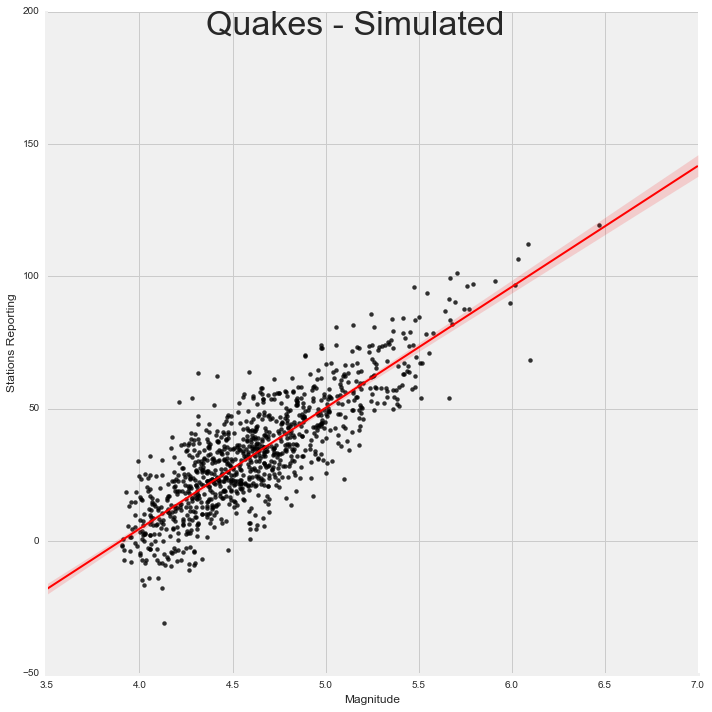

In [64]:
p_sim = sns.lmplot(x="mag",y="y_sim",data=simulation,x_jitter=0.1, line_kws={'color': 'red', 'lw':'2'}, 
                scatter_kws={'color':'black'}, 
                size=10)
p_sim.set_axis_labels("Magnitude","Stations Reporting")
p_sim.fig.suptitle("Quakes - Simulated", fontsize=34)

The simulation is similar to the original data in that it shows a positive correlation between magnitude 
and stations reporting. However, it appears to have a more equal variance in the residuals than the 
original data. By using a more flexible model (especially one that doesn't assume equal variance or 
linear shape) we may be able to better fit the data.

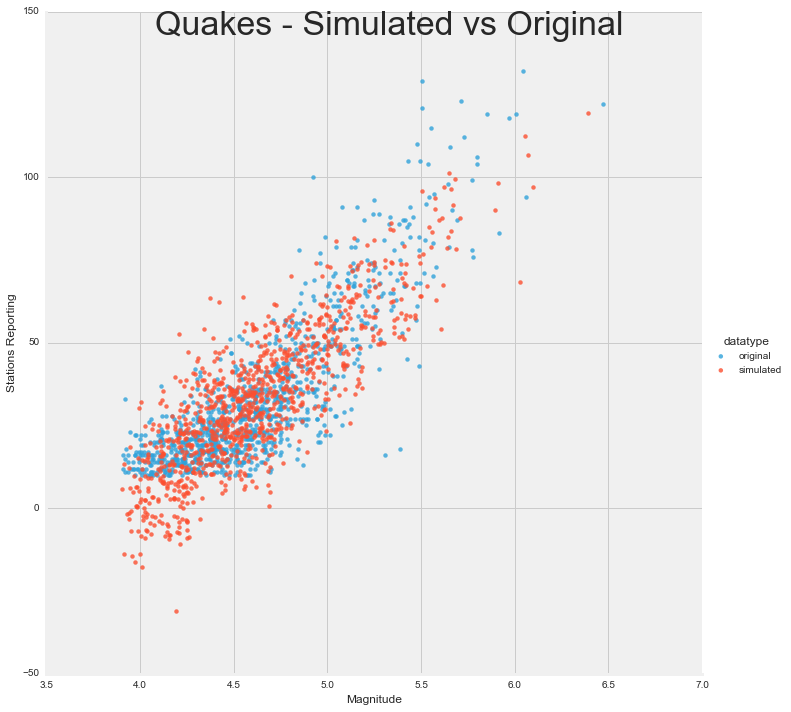

In [75]:
simulation2 = pd.DataFrame()
simulation2["stations"] = simulation["y_sim"]
simulation2["mag"] = simulation["mag"]
simulation2["datatype"] = "simulated"
quakes["datatype"] = "original"
quakes2 = quakes[["stations","mag","datatype"]]
both = pd.concat([quakes,simulation2])

p_sim = sns.lmplot(x="mag",y="stations",data=both,fit_reg=False,x_jitter=0.1, hue="datatype", 
                size=10)
p_sim.set_axis_labels("Magnitude","Stations Reporting")
p_sim.fig.suptitle("Quakes - Simulated vs Original", fontsize=34)